In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [2]:
import pandas as pd
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from src.CellAbundance import CellAbundance, generate_abundance_matrix, join_abundance_matrices
from src.utils.visualization import plot_cells_positions, plot_cev_radius, plot_stacked_var_radius

In [3]:
N_SITE = 100
PATIENT_ID = 4
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
METHOD = 'abs'
PCA_SCALED = False
patient_ids = [1, 2, 3, 4, 5]
radius = np.linspace(np.log(5), np.log(390), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

In [4]:
abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root="../../output") for r in radius} for p in patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=PCA_SCALED)

expr_var = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}

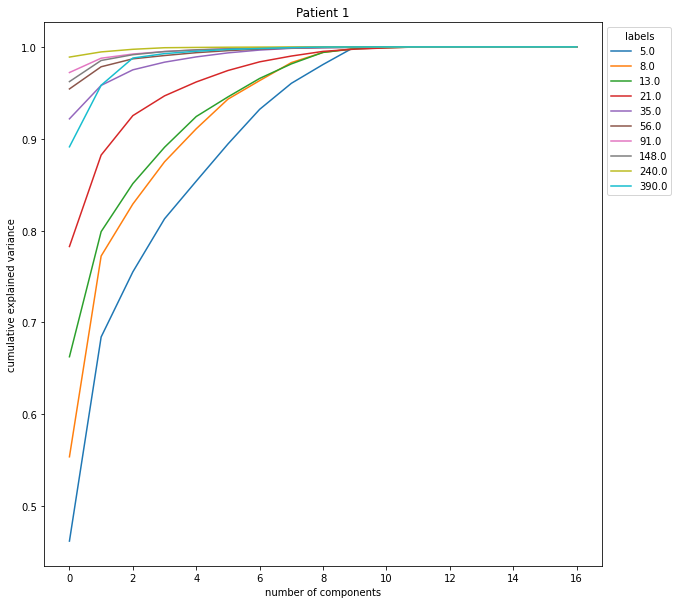

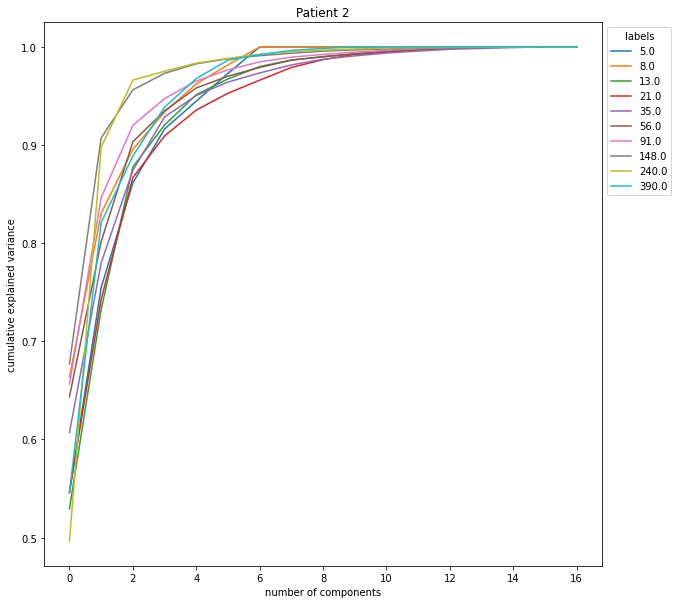

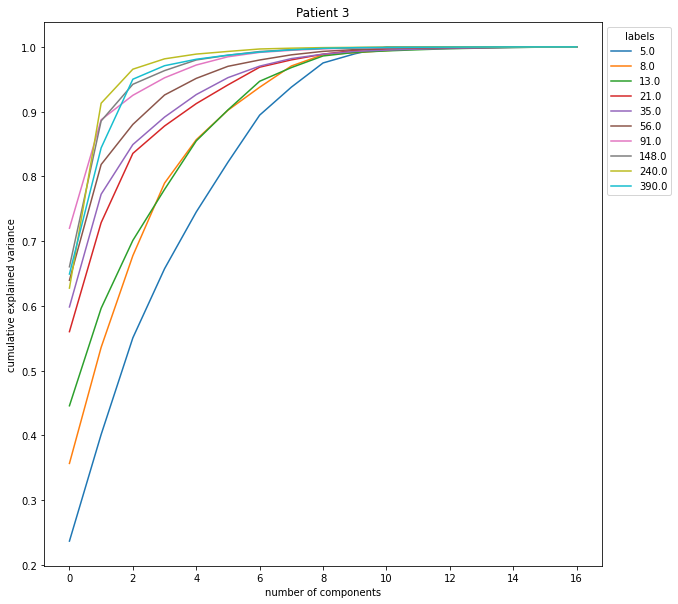

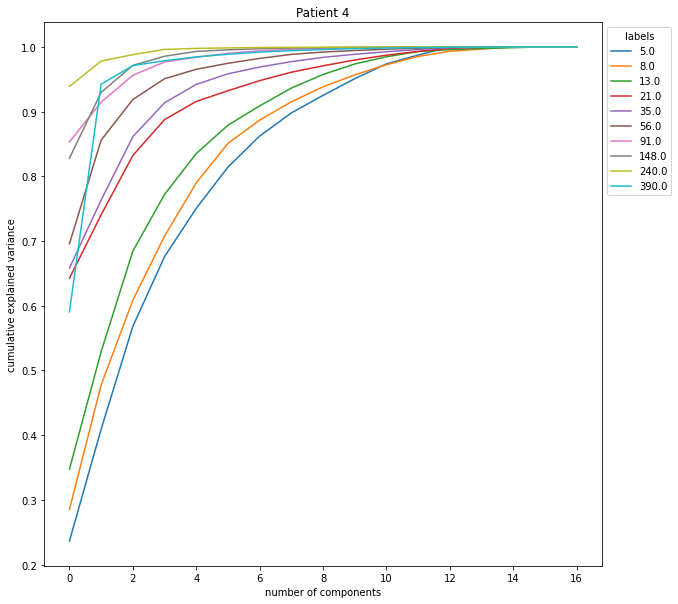

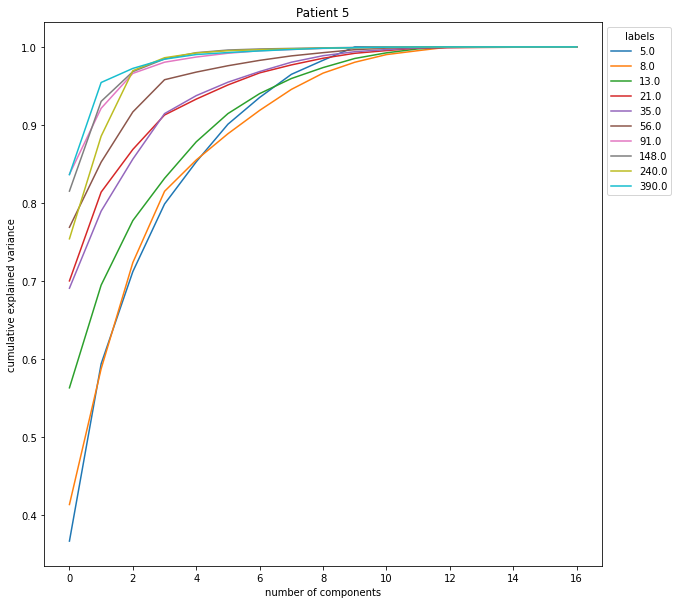

In [5]:
for p in patient_ids:
    plot_cev_radius(expr_var[p], p)

In [6]:
expl_var_ratio = {p: {r: ca.pca.explained_variance_ratio_ for r, ca in v.items()} for p, v in abundances.items()}

In [7]:
expl_var_ratio

{1: {5.0: array([4.61864642e-01, 2.22279441e-01, 7.08823356e-02, 5.78083860e-02,
         4.10004100e-02, 4.04592896e-02, 3.77436754e-02, 2.83222560e-02,
         2.05002050e-02, 1.91393596e-02, 5.40033468e-34, 1.59174461e-34,
         4.78680699e-36, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  8.0: array([5.53644980e-01, 2.18651408e-01, 5.66106852e-02, 4.59852444e-02,
         3.59828739e-02, 3.22411615e-02, 2.02101084e-02, 1.96102895e-02,
         1.10419874e-02, 4.35626089e-03, 1.66500121e-03, 3.89851700e-34,
         7.28995715e-35, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  13.0: array([6.62611328e-01, 1.36240345e-01, 5.22924509e-02, 3.95814654e-02,
         3.34862160e-02, 2.13484725e-02, 2.01142762e-02, 1.58427215e-02,
         1.25450080e-02, 3.83133226e-03, 1.20120948e-03, 9.05175571e-04,
         4.95745421e-36, 8.35106855e-37, 2.29391066e-68, 0.00000000e+00,
         0.00000000e+00]),
  21.0: array([7.8264877

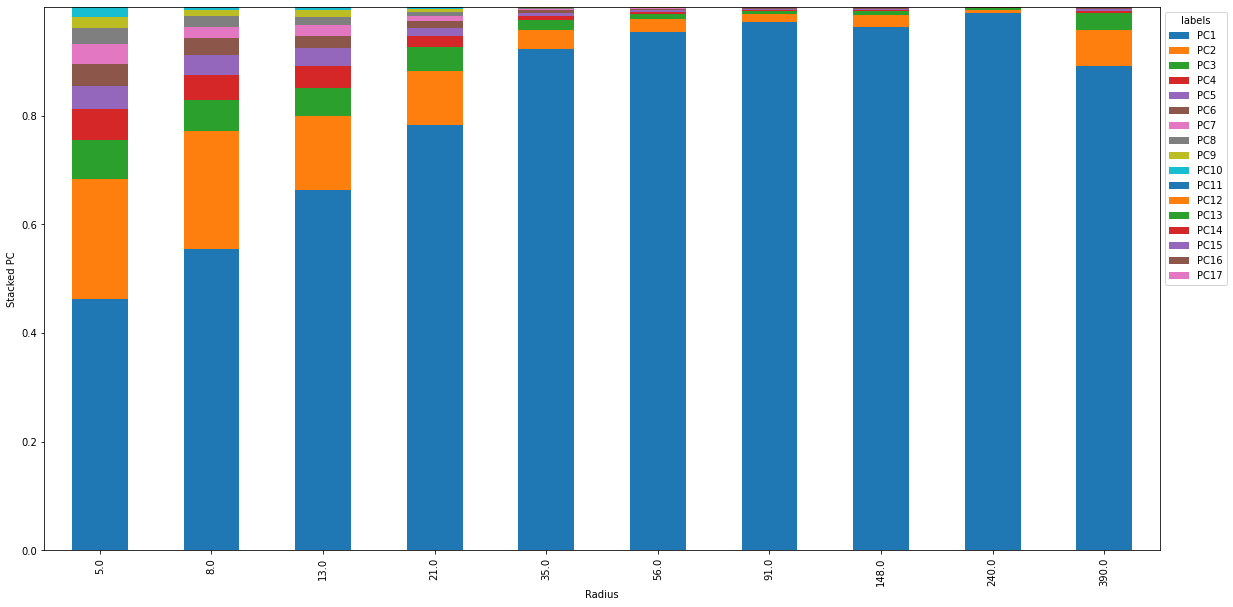

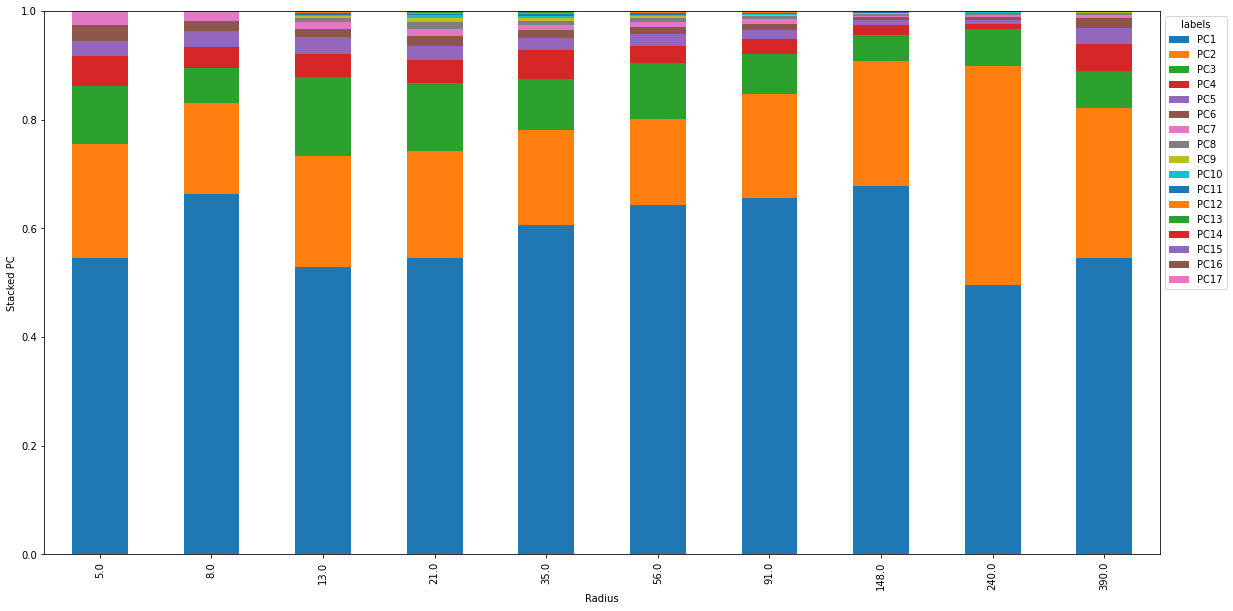

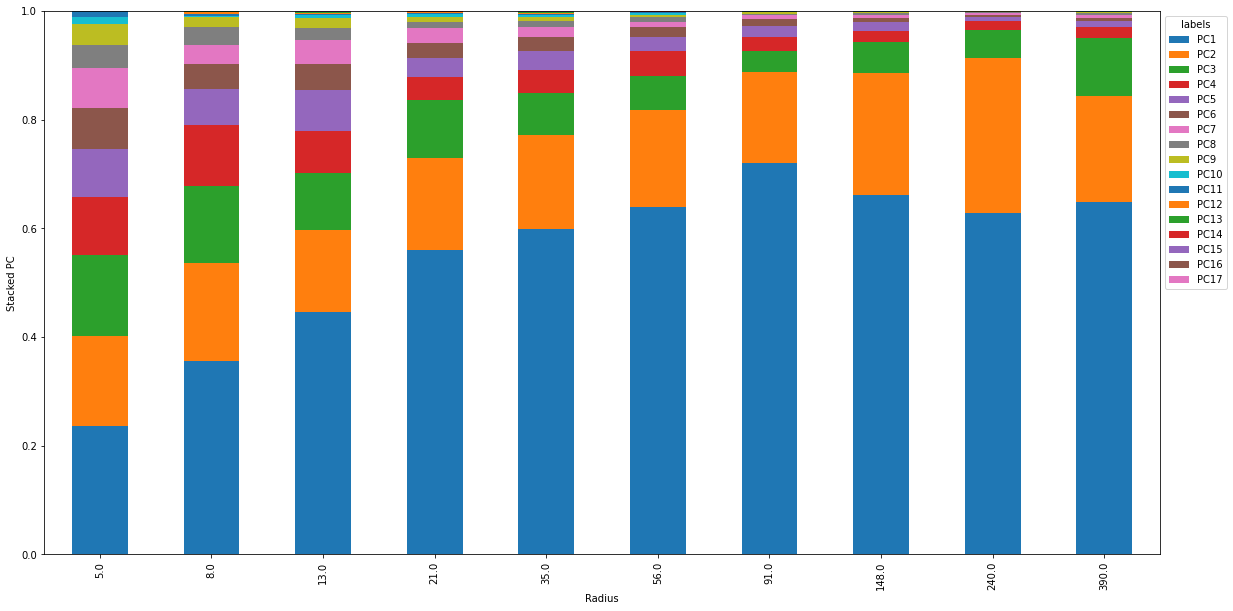

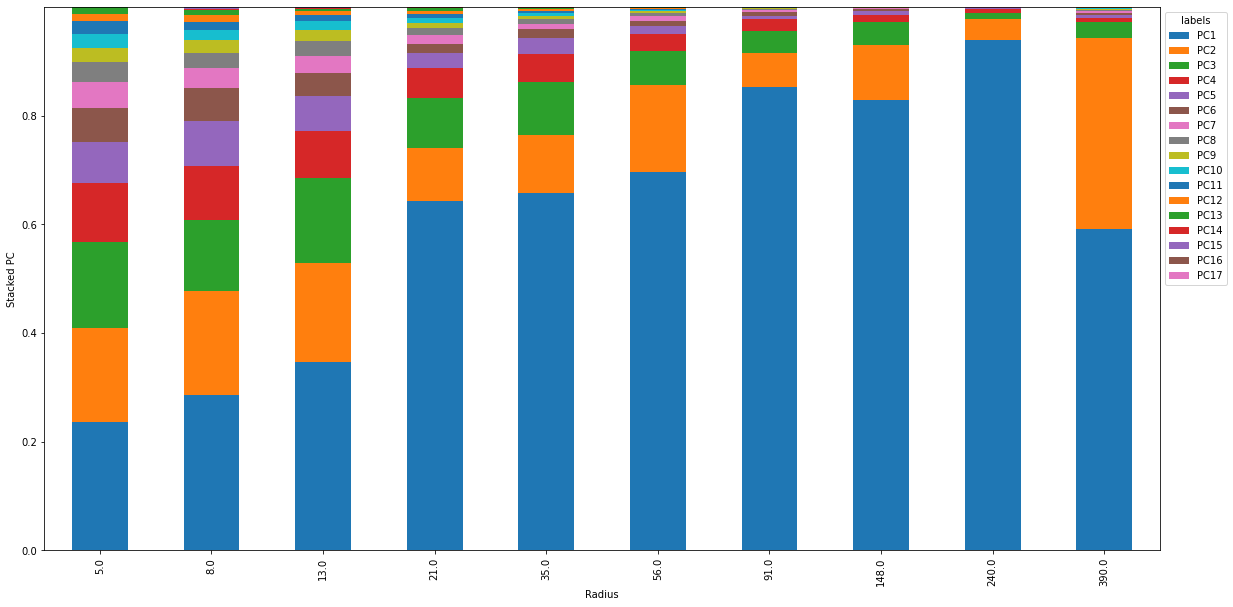

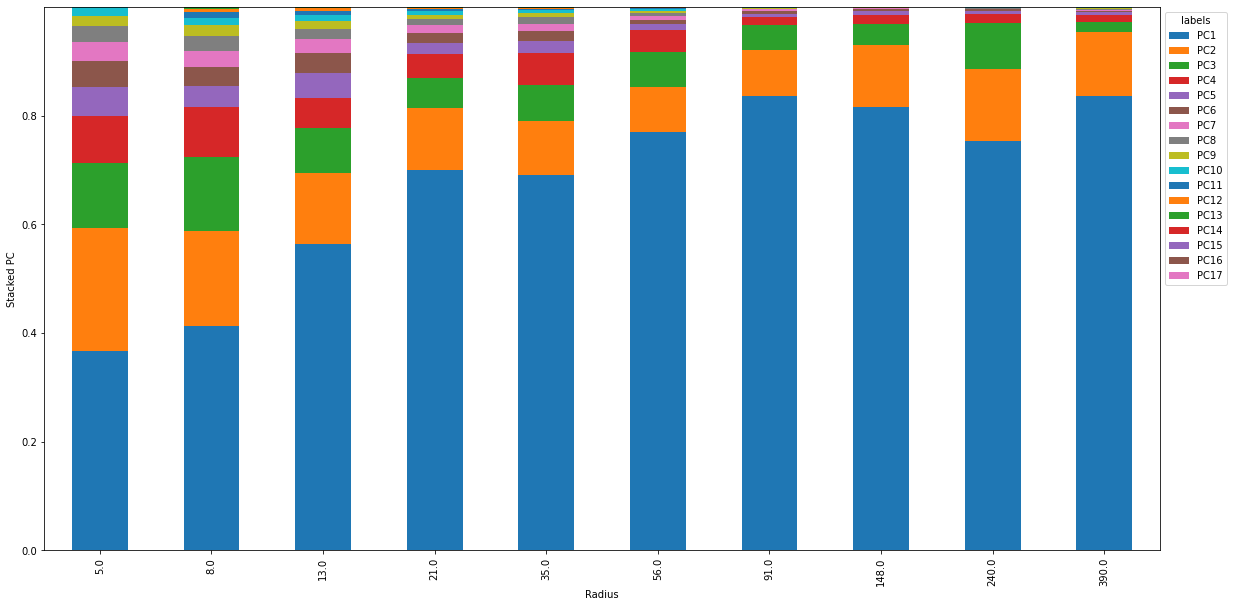

In [8]:
for p in patient_ids:
    plot_stacked_var_radius(expl_var_ratio[p])

In [9]:
expl_var_ratio = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}
expl_var_ratio

{1: {5.0: array([0.46186464, 0.68414408, 0.75502642, 0.8128348 , 0.85383521,
         0.8942945 , 0.93203818, 0.96036044, 0.98086064, 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        ]),
  8.0: array([0.55364498, 0.77229639, 0.82890707, 0.87489232, 0.91087519,
         0.94311635, 0.96332646, 0.98293675, 0.99397874, 0.998335  ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        ]),
  13.0: array([0.66261133, 0.79885167, 0.85114412, 0.89072559, 0.9242118 ,
         0.94556028, 0.96567455, 0.98151727, 0.99406228, 0.99789361,
         0.99909482, 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        ]),
  21.0: array([0.78264878, 0.88221733, 0.92516936, 0.94669926, 0.96183619,
         0.97431021, 0.98375379, 0.99005081, 0.99512698, 0.99756509,
         0.99892192, 0.99995962, 1.        , 1.        , 1.        ,
         1.        , 1.        ]),
  35.0:

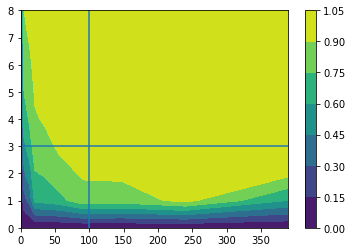

In [10]:
def get_explained_variance_matrix(X, Y, expl_var_ratio):
    z = np.empty((X.shape[0], Y.shape[1]))
    for i, x in enumerate(X.T):
        if x[0] != 0:
            z[:, i] = np.insert(expl_var_ratio[p][x[0]], 0, 0.0)
        else:
            z[:, i] = np.zeros(18)
    
    return z
    
p = 4
x = [0] + list(expl_var_ratio[p].keys())
y = np.arange(0, 18)
X, Y = np.meshgrid(x, y)
Z = get_explained_variance_matrix(X, Y, expl_var_ratio)
plt.contourf(X, Y, Z)
plt.axvline(x=100)
plt.axhline(y=3)
plt.ylim(0, 8)
plt.colorbar()
plt.show()

In [11]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z.shape

(40, 50)